## 1.- Librerias

In [ ]:
# Instalar librerias
!pip install xwrf
!pip install salem
!pip install netCDF4
!pip install wrf-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 14.8 MB/s eta 0:00:00
  Created wheel for wrf-python: filename=wrf_python-1.3.4.1-cp310-cp310-linux_x86_64.whl size=627024 sha256=5af95d998fa701edd889372e7e33b29a089ea416e055beb4d3b0d0ae579a7c2d
  Stored in directory: /root/.cache/pip/wheels/67/e1/53/9fa18acf00e88c15b3038e736ce7cd23cfb37361a2564d4db5
Successfully built wrf-python


In [ ]:
#-----------------------------------
# Library import
from salem import geogrid_simulator
import matplotlib.pyplot as plt
from osgeo import gdal, osr
import seaborn as sbn
import xarray as xr
import pandas as pd
import numpy as np
import salem
import glob
import xwrf
import os
#----------------------------------
from netCDF4 import Dataset
from wrf import getvar, interpline, CoordPair, xy_to_ll, ll_to_xy
#----------------------------------

In [ ]:
#-----------------------------------
# Montar carpeta contenedor de datos
from google.colab import drive
drive.mount('/content/drive')
#-----------------------------------

Mounted at /content/drive


In [ ]:
#----------------------------------
# Vizualizacion de variables.
path = "drive/MyDrive/WRF_Chem/datos_WRF/20231108R/"
nc15k = salem.open_wrf_dataset(path + "wrfout_d01_2023-11-08_00:00:00")
#---------------------------------

In [ ]:
nc15k.info()

xarray.Dataset {
dimensions:
	time = 1 ;
	bottom_top = 44 ;
	south_north = 88 ;
	west_east = 58 ;
	bio_emissions_dimension = 157 ;
	klevs_for_dvel = 1 ;
	soil_layers = 3 ;
	seed_dim = 7 ;

variables:
	float32 AOD_OUT(time, bottom_top, south_north, west_east) ;
		AOD_OUT:FieldType = 104 ;
		AOD_OUT:MemoryOrder = XYZ ;
		AOD_OUT:description = Aerosol Optical Depth ;
		AOD_OUT:units =  ;
		AOD_OUT:stagger =  ;
		AOD_OUT:pyproj_srs = +proj=lcc +lat_0=-9.19998931884766 +lon_0=-79 +lat_1=30 +lat_2=60 +x_0=0 +y_0=0 +R=6370000 +units=m +no_defs ;
	float32 AOD2D_OUT(time, south_north, west_east) ;
		AOD2D_OUT:FieldType = 104 ;
		AOD2D_OUT:MemoryOrder = XY  ;
		AOD2D_OUT:description = Aerosol Optical Depth, 2d ;
		AOD2D_OUT:units =  ;
		AOD2D_OUT:stagger =  ;
		AOD2D_OUT:pyproj_srs = +proj=lcc +lat_0=-9.19998931884766 +lon_0=-79 +lat_1=30 +lat_2=60 +x_0=0 +y_0=0 +R=6370000 +units=m +no_defs ;
	float32 ATOP2D_OUT(time, south_north, west_east) ;
		ATOP2D_OUT:FieldType = 104 ;
		ATOP2D_OUT:MemoryOr

## 2.- Plot de variable

In [ ]:
#----------------------------------
# Cargamos el dato para graficar
path = "drive/MyDrive/WRF_Chem/datos_WRF/20231108R/"
ds = salem.open_wrf_dataset(path + "wrfout_d01_2023-11-08_00:00:00")
ds2 = salem.open_wrf_dataset(path + "wrfout_d02_2023-11-08_00:00:00")
#----------------------------------
# Viendo variable T2 - temperatura a 2m
ds2.T2
#----------------------------------

<xarray.DataArray 'T2' (time: 1, south_north: 70, west_east: 35)>
[2450 values with dtype=float32]
Coordinates:
    lat          (south_north, west_east) float32 -9.921 -9.921 ... -8.658
    lon          (south_north, west_east) float32 -77.88 -77.86 ... -77.22
    xtime        (time) datetime64[ns] ...
  * time         (time) datetime64[ns] 2023-11-08
  * west_east    (west_east) float64 1.816e+05 1.846e+05 ... 2.806e+05 2.836e+05
  * south_north  (south_north) float64 -1.163e+05 -1.133e+05 ... 9.075e+04
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  TEMP at 2 M
    units:        K
    stagger:      
    pyproj_srs:   +proj=lcc +lat_0=-9.19998931884766 +lon_0=-79 +lat_1=30 +la...

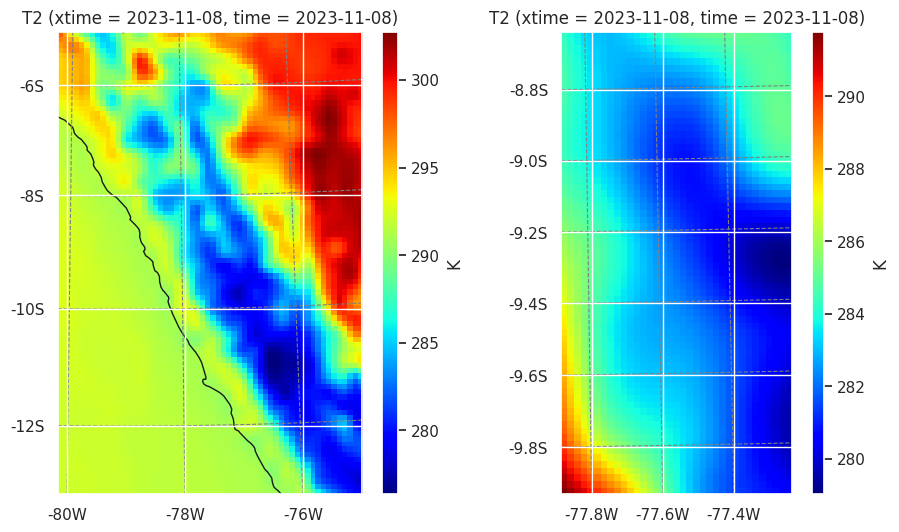

In [ ]:
# plot de variables T2(3km) y 15km
#---------------------------------------------------------
plt.figure(figsize=[11,6])
#---------------------------------------------------------
plt.subplot(1,2,1)

nc_data1d = ds.T2.squeeze()
ds.T2.isel(time=0).salem.quick_map(cmap='jet',vmin=np.min(nc_data1d),
                                   vmax=np.max(nc_data1d))
#---------------------------------------------------------
plt.subplot(1,2,2)

nc_data2d = ds2.T2.squeeze()
ds2.T2.isel(time=0).salem.quick_map(cmap='jet',vmin=np.min(nc_data2d),
                                   vmax=np.max(nc_data2d))
#---------------------------------------------------------

## 3. Extracción de valor (T2) por pixel - cubre estación.

### 3.1. Extracción de coodenada  y valor de pixel (T2) que cubre la estación.

In [ ]:
#---------------------------------------------------------------------------
# cargado datos NetCDF -
path = "drive/MyDrive/WRF_Chem/datos_WRF/20231108R/"
ncfile3k = Dataset(path+"wrfout_d02_2023-11-08_00:00:00")
#---------------------------------------------------------------------------
# Obteniendo el valor cordenada del pixel
x_y = ll_to_xy(ncfile3k, -9.51, -77.51)
print("coord.pixel:",x_y)
# Valor de la variable en funcion cord. pixel
slp = getvar(ncfile3k, "T2")[x_y[0],x_y[1]]
print("Valor del pixel",slp)
#---------------------------------------------------------------------------

coord.pixel: <xarray.DataArray 'xy' (x_y: 2)>
array([19, 23])
Coordinates:
    latlon_coord  object CoordPair(lat=-9.51, lon=-77.51)
  * x_y           (x_y) <U1 'x' 'y'
Valor del pixel <xarray.DataArray 'T2' ()>
array(282.1887, dtype=float32)
Coordinates:
    XLONG         float32 -77.44
    XLAT          float32 -9.579
    XTIME         float32 0.0
    Time          datetime64[ns] 2023-11-08
    latlon_coord  object CoordPair(lat=-9.51, lon=-77.51)
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  TEMP at 2 M
    units:        K
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=-79.0, moad_cen_lat=-9.199989318...


### 3.2. Extracción de T2 para tadas las capas que cubre estación.

In [ ]:
#---------------------------------------------------------------------------
# Cargando los datos
pathNC = "drive/MyDrive/WRF_Chem/datos_WRF/20231108R/"
# Cargando solo con formato
list_i = glob.glob(pathNC + "wrfout_d02*")
# reordenando los datos
#list_ii=sorted(list_i, key=os.path.getmtime, reverse=False)
# listar las 10 primeras imagenes
list_iii=list_i[0:len(list_i)]
#---------------------------------------------------------------------------
# Carga de las capas - D1(3km)
wrf_in = [Dataset(x) for x in list_iii]
#---------------------------------------------------------------------------
# Valor de la variable en funcion cord. pixel
listA=[]
for i in wrf_in:
  #print(i)
  slp = getvar(i, "T2", meta=False)[x_y[0],x_y[1]]
  listA.append(slp)
#  Vislualizar los. pimeros 4 datos
print("Valor del pixel:",list(listA[0:3]))
#---------------------------------------------------------------------------
# Referencia
# https://wrf-python.readthedocs.io/en/latest/internals.html
# https://wrf-python.readthedocs.io/en/latest/basic_usage.html#lat-lon-xy-routines

#---------------------------------------------------------------------------

Valor del pixel: [282.95743, 285.95337, 285.68192]


In [ ]:
# Valor de la variable en funcion cord. pixel
slp = getvar(wrf_in[0], "T2", meta=False)[x_y[0],x_y[1]]

#  Vislualizar los. pimeros 4 datos
print("Valor del pixel:",slp)

Valor del pixel: 282.95743


In [ ]:
#---------------------------------------------------------------------------
# Lista a DataFrame
wrfDF = pd.DataFrame(listA, columns=["T2"])
# exporta los datos generados
path_export = "drive/MyDrive/WRF_Chem/datos_WRF/DataFrame/"
wrfDF.to_csv(path_export+"WRF_T2.csv", sep=',',index=False)
#---------------------------------------------------------------------------
# Viendo el dato.
wrfDF
#---------------------------------------------------------------------------


,T2
0,282.957428
1,285.953369
2,285.681915
3,278.007294
4,279.048798
5,284.777985
6,277.799713
7,277.670715
8,280.764526
9,282.188690


## 4.Plot datos - T2

### 4.1 Datos salida WRF-T2

In [ ]:
#---------------------------------------------------------------------------
# Leyendo el DataFrame
pathWRF = "drive/MyDrive/WRF_Chem/datos_WRF/DataFrame/"
df_WRFT2 = pd.read_csv(pathWRF + "WRF_T2.csv") #
# Vizualizando los primeros datos
df_WRFT2.head()
#---------------------------------------------------------------------------

,T2
0,282.95743
1,285.95337
2,285.68192
3,278.00730
4,279.04880


<Axes: xlabel='T2', ylabel='Count'>

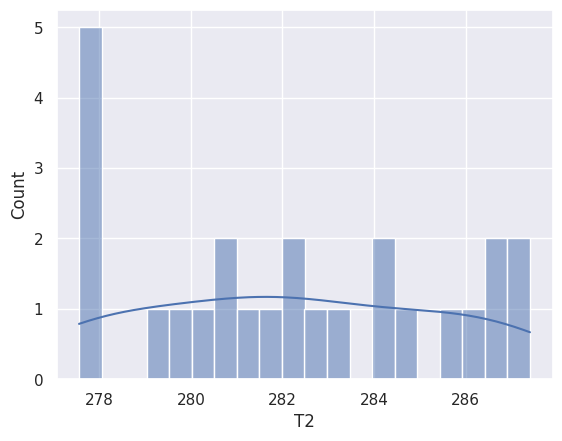

In [ ]:
#---------------------------------------------------------------------------
# viendo valores en histograma
sbn.set()
sbn.histplot(data = df_WRFT2, x = "T2", kde = True, bins=20)
#---------------------------------------------------------------------------


In [ ]:
#---------------------------------------------------------------------------
# seleccionando la columan T2
df_WRF = df_WRFT2[0:24]['T2']
df_WRF.head()
#---------------------------------------------------------------------------


0    282.95743
1    285.95337
2    285.68192
3    278.00730
4    279.04880
Name: T2, dtype: float64

### 4.1 Datos de campo

In [ ]:
# Cargar datos
path_DC = "drive/MyDrive/WRF_Chem/datos_campo/Huaraz-ElPinar/"
os.listdir(path_DC)
# Leyendo el DataFrame
df_DC = pd.read_csv(path_DC + "PurplePinarHour.csv") #
df_DC.head()


,date,hour,avg_temp_c,avg_humidity,min_dewpoint_f,avg_pressure,pm1_0_cf_1,pm2_5_cf_1,pm10_0_cf_1,pm1_0_atm,pm2_5_atm,pm10_0_atm,pm2_5_aqi_cf_1,pm2_5_aqi_atm,p_0_3_um,p_0_5_um,p_1_0_um,p_2_5_um,p_5_0_um,p_10_0_um
0,2023-09-05,20,27.222222,53.250000,61,1002.536250,89.53,138.80,184.71,89.53,138.80,184.71,501,501,17004.12,4981.92,893.29,134.29,68.81,27.81
1,2023-09-26,19,26.031746,55.000000,60,1005.811429,73.78,115.70,171.24,73.78,115.70,171.24,424,424,13480.40,4011.68,821.66,134.27,80.70,34.53
2,2023-10-12,15,23.518519,25.333333,35,690.236667,9.48,15.30,17.50,9.48,15.30,17.50,63,63,2362.31,676.23,98.42,12.12,4.17,0.59
3,2023-10-12,16,23.256705,22.931034,32,689.711379,91.14,131.94,151.73,91.14,131.65,150.89,552,551,21582.00,6240.24,833.88,69.34,29.39,12.13
4,2023-10-12,17,23.907407,23.633333,33,689.221000,134.70,195.75,221.08,134.70,195.75,221.08,812,812,28337.44,8259.53,1177.52,97.43,38.51,13.85


Lista de columnas: ['date' 'hour' 'avg_temp_c' 'avg_humidity' 'min_dewpoint_f' 'avg_pressure'
 'pm1_0_cf_1' 'pm2_5_cf_1' 'pm10_0_cf_1' 'pm1_0_atm' 'pm2_5_atm'
 'pm10_0_atm' 'pm2_5_aqi_cf_1' 'pm2_5_aqi_atm' 'p_0_3_um' 'p_0_5_um'
 'p_1_0_um' 'p_2_5_um' 'p_5_0_um' 'p_10_0_um']


<Axes: xlabel='avg_temp_c', ylabel='Count'>

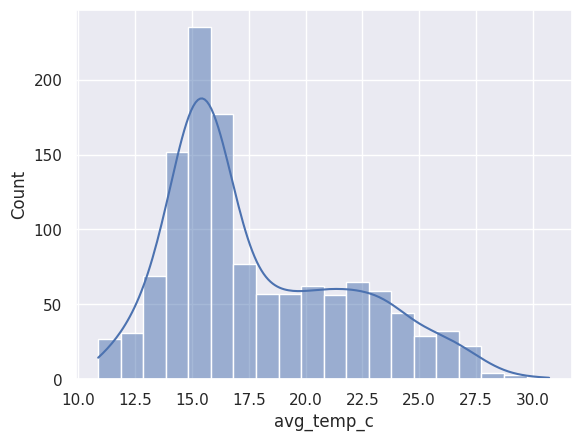

In [ ]:
#---------------------------------------------------------------------------
# Nombre de la columna
print("Lista de columnas:", df_DC.columns.values)
#---------------------------------------------------------------------------
# viendo valores en histograma
sbn.set()
sbn.histplot(data = df_DC, x = "avg_temp_c", kde = True, bins=20)
#---------------------------------------------------------------------------

In [ ]:
#---------------------------------------------------------------------------
# Seleccionar datos
df_DCTC = df_DC[589:613]["avg_temp_c"]
# exporta los datos seleccionados
path_export = "drive/MyDrive/WRF_Chem/datos_WRF/DataFrame/"
df_DCTC.to_csv(path_export+"Campo_T.csv", sep=',',index=False)
df_DCTC

589    17.074074
590    16.296296
591    16.574074
592    15.685185
593    15.074074
594    14.833333
595    14.074074
596    13.351852
597    13.055556
598    12.814815
599    12.518519
600    14.222222
601    16.814815
602    20.592593
603    22.833333
604    24.518519
605    25.481481
606    27.277778
607    28.259259
608    28.703704
609    27.185185
610    26.259259
611    23.796296
612    18.740741
Name: avg_temp_c, dtype: float64

In [ ]:
#---------------------------------------------------------------------------
# Leyendo el DataFrame
pathWRF = "drive/MyDrive/WRF_Chem/datos_WRF/DataFrame/"
df_DCTC2 = pd.read_csv(pathWRF + "Campo_T.csv") #
# Vizualizando los primeros datos
df_DCTC2.head()
#---------------------------------------------------------------------------


,avg_temp_c
0,17.074074
1,16.296296
2,16.574074
3,15.685185
4,15.074074


<Axes: xlabel='avg_temp_c', ylabel='Count'>

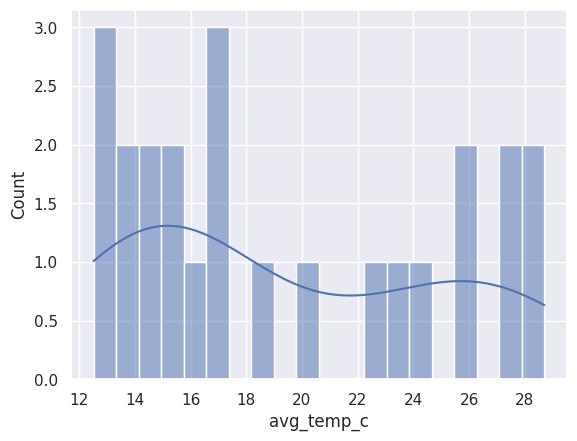

In [ ]:
#---------------------------------------------------------------------------
# viendo valores en histograma
sbn.set()
sbn.histplot(data = df_DCTC2, x = "avg_temp_c", kde = True, bins=20)
#---------------------------------------------------------------------------

### 4.2 Concatenar datos - campo y wrf

In [ ]:
#---------------------------------------------------------------------------
# concatenando
dato_wrf_C = pd.concat([df_DCTC2, df_WRF], axis= 1, ignore_index=False)
# nombre de columnas
dato_wrf_C.columns = ["Tcampo", "Twrf"]
dato_wrf_C.head()
#---------------------------------------------------------------------------

,Tcampo,Twrf
0,17.074074,282.95743
1,16.296296,285.95337
2,16.574074,285.68192
3,15.685185,278.00730
4,15.074074,279.04880


#### 4.2.1 Plot correlación

<Axes: xlabel='Tcampo', ylabel='Twrf'>

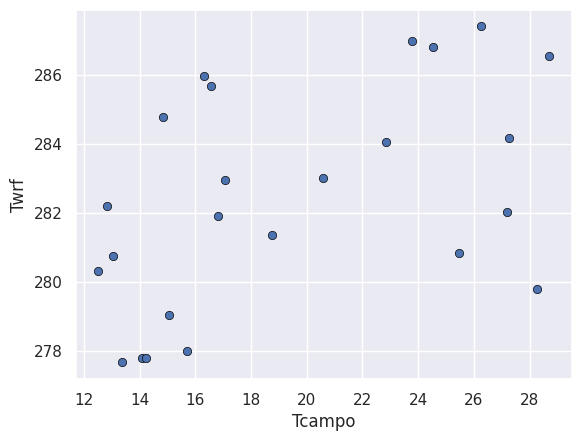

In [ ]:
#---------------------------------------------------------------------------
# Grafica de dispersión
sbn.set()
sbn.scatterplot(data=dato_wrf_C, x="Tcampo", y="Twrf",
                    alpha = 1, edgecolor = "black")
#---------------------------------------------------------------------------


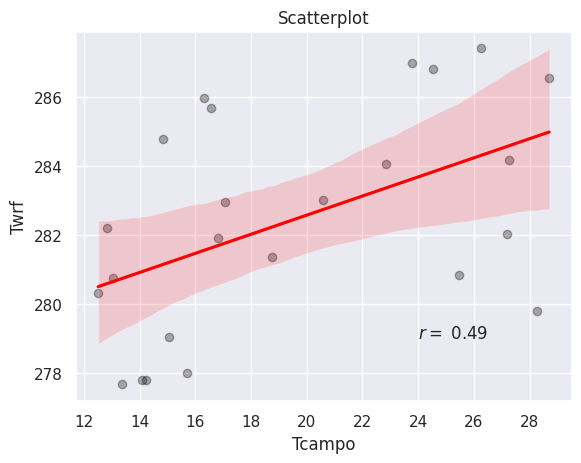

In [ ]:
#-------------------------------------------------------------------------------
# Visualizando en diagrama de dispersion Tcampo - Twrf
sbn.set()
# Coeficiente r
r = np.corrcoef(dato_wrf_C["Tcampo"], dato_wrf_C["Twrf"])

# Linea de regresion
sbn.regplot(x=dato_wrf_C["Tcampo"], y=dato_wrf_C["Twrf"], data=dato_wrf_C,
            scatter_kws={'color':'black', 'alpha':0.3},
            line_kws={'color':'red'})
#
plt.title('Scatterplot')
plt.text(24, 279, "$r=$ {:.2f}".format(r[0,1]))
#plt.savefig(pathWRF+'Tcampo_wrf.pdf', dpi=50, bbox_inches='tight')
plt.show()
#-------------------------------------------------------------------------------

In [ ]:
#---------------------------------------------------------------------------
# RMSE
def rmse(real, pred):
  real, pred = np.array(real), np.array(pred)
  return(np.sqrt(np.mean((np.array(real) - np.array(pred))**2)))

# MAE
def mae(real, pred):
  real, pred = np.array(real), np.array(pred)
  return(np.mean(np.abs(np.array(real) - np.array(pred))))

# Bias - sesgo
def B(real, pred):
  real, pred = np.array(real), np.array(pred)
  return(np.mean(pred - real))
#---------------------------------------------------------------------------
# aplicando
Cal_rmse = rmse(dato_wrf_C["Twrf"]-273.15, dato_wrf_C["Tcampo"] )
Cal_mae =   mae(dato_wrf_C["Twrf"]-273.15, dato_wrf_C["Tcampo"] )
Cal_B =       B(dato_wrf_C["Twrf"]-273.15, dato_wrf_C["Tcampo"] )
#---------------------------------------------------------------------------
print("RMSE:", Cal_rmse)
print("MAE:", Cal_mae)
print("Bias:", Cal_B)
#---------------------------------------------------------------------------

# Ref
# https://aprendeia.com/evaluando-el-error-en-los-modelos-de-regresion/


RMSE: 11.245956122845925
MAE: 10.155425293209856
Bias: 10.155425293209856


# Plot adicionales - salem

In [ ]:
from salem import open_wrf_dataset as DatasetS
list_iv = list_i[0:4]
wrf_inS = [DatasetS(x) for x in list_iv]

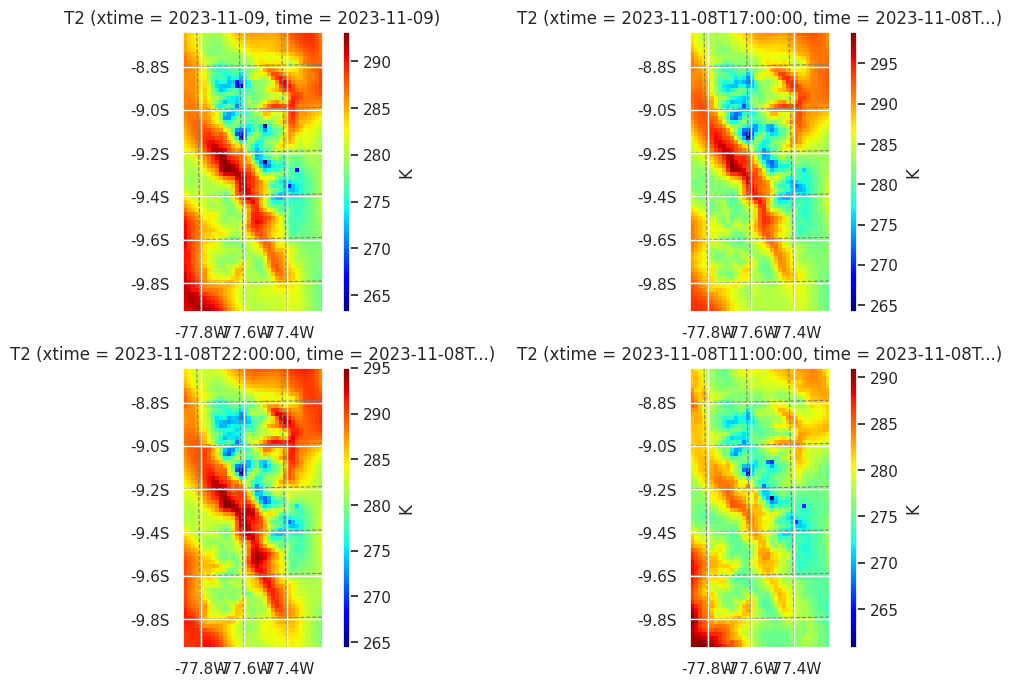

In [ ]:
plt.figure(figsize=[12,8])
#---------------------------------------------------------
plt.subplot(2,2,1)

nc_data1d = wrf_inS[0].T2.squeeze()
wrf_inS[0].T2.isel(time=0).salem.quick_map(cmap='jet',vmin=np.min(nc_data1d),
                                   vmax=np.max(nc_data1d))
#---------------------------------------------------------
plt.subplot(2,2,2)


nc_data2d = wrf_inS[1].T2.squeeze()
wrf_inS[1].T2.isel(time=0).salem.quick_map(cmap='jet',vmin=np.min(nc_data2d),
                                   vmax=np.max(nc_data2d))
#---------------------------------------------------------
plt.subplot(2,2,3)
#
nc_data2d = wrf_inS[2].T2.squeeze()
wrf_inS[2].T2.isel(time=0).salem.quick_map(cmap='jet',vmin=np.min(nc_data2d),
                                   vmax=np.max(nc_data2d))
#---------------------------------------------------------
plt.subplot(2,2,4)

nc_data2d = wrf_inS[3].T2.squeeze()
wrf_inS[3].T2.isel(time=0).salem.quick_map(cmap='jet',vmin=np.min(nc_data2d),
                                   vmax=np.max(nc_data2d))
#---------------------------------------------------------

&share
 wrf_core = 'ARW',
 max_dom = 2,
 start_date = '2023-11-08_00:00:00','2023-11-08_00:00:00',
 end_date   = '2023-11-09_00:00:00','2023-11-09_00:00:00',
 interval_seconds = 3600
 /

&geogrid
 parent_id         =   1,   1,
 parent_grid_ratio =   1,   5,
 i_parent_start    =   1,   26,
 j_parent_start    =   1,   37,
 e_we              =   59,  36,
 e_sn              =   89,  71,
 geog_data_res = 'default','default',
 dx = 15000,
 dy = 15000,
 map_proj  = 'mercator',
 ref_lat   =  -9.2,
 ref_lon   = -77.5,
 truelat1  =  -9.2,
 !truelat2  =  60.0,
 stand_lon = -77.5, ! meridiano central del dominio
 geog_data_path = '/home/aireandino/Models/WRF-Chem/WPS_GEOG/'
 /
 
&ungrib
 out_format = 'WPS',
 prefix = 'GFS',
/
 
&metgrid
 fg_name = 'FILE'
 /


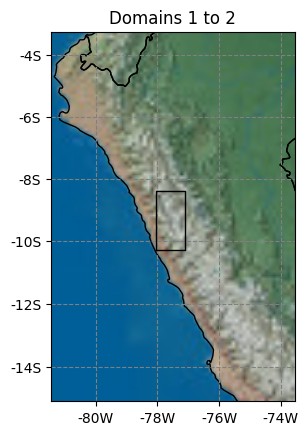

In [ ]:
#-------------------------------------------------------------------------------
fpath = path + "C_phanton_namelist.wps"

with open(fpath, 'r') as f:  # this is just to show the file
    print(f.read())

g, maps = geogrid_simulator(fpath)
maps[0].set_rgb(natural_earth='lr')  # add a background image
maps[0].visualize(title='Domains 1 to 2');
#-------------------------------------------------------------------------------

## Fin !!!

In [ ]:
#-------------------------------------------------------------------------------